<a href="https://colab.research.google.com/github/AbhilashK26/MNIST-digit-Classification-using-Neural-Network/blob/main/mnist_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop

In [ ]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()


unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 1s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


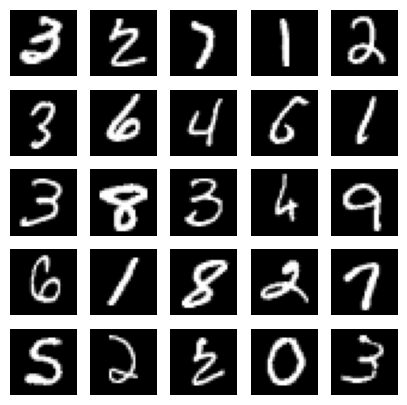

In [ ]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [ ]:
num_labels = len(np.unique(y_train))


In [ ]:
print(num_labels)

10


In [ ]:
y_train.shape


(60000,)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[3]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:

image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:

x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
x_train[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [ ]:
batch_size = 128
hidden_units = 256

In [ ]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
# model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


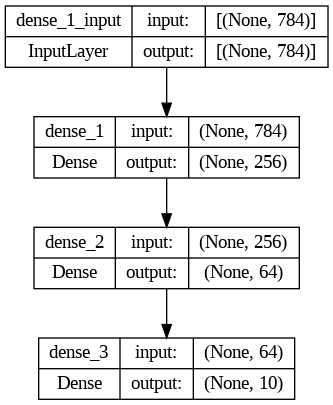

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 4s 7ms/step - loss: 1.1711 - accuracy: 0.6679 - val_loss: 0.5080 - val_accuracy: 0.8600
Epoch 2/20
422/422 [==============================] - 3s 7ms/step - loss: 0.4704 - accuracy: 0.8623 - val_loss: 0.3465 - val_accuracy: 0.9038
Epoch 3/20
422/422 [==============================] - 3s 6ms/step - loss: 0.3731 - accuracy: 0.8915 - val_loss: 0.2901 - val_accuracy: 0.9165
Epoch 4/20
422/422 [==============================] - 4s 9ms/step - loss: 0.3334 - accuracy: 0.9041 - val_loss: 0.2640 - val_accuracy: 0.9255
Epoch 5/20
422/422 [==============================] - 3s 7ms/step - loss: 0.3100 - accuracy: 0.9104 - val_loss: 0.2446 - val_accuracy: 0.9288
Epoch 6/20
422/422 [==============================] - 3s 6ms/step - loss: 0.2931 - accuracy: 0.9149 - val_loss: 0.2315 - val_accuracy: 0.9342
Epoch 7/20
422/422 [==============================] - 3s 6ms/step - loss: 0.2803 - accuracy: 0.9188 - val_loss: 0.2183 - val_accuracy: 0.9377
Epoch 

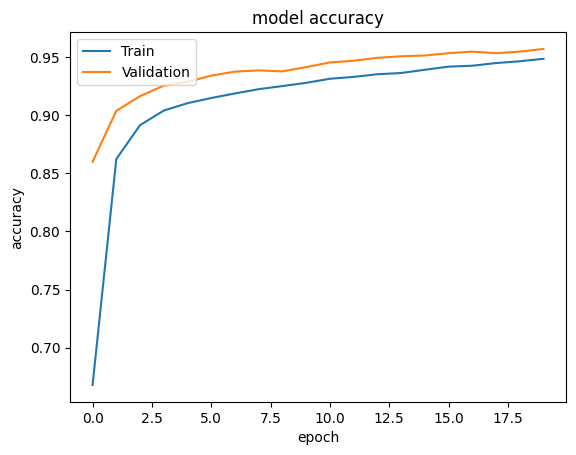

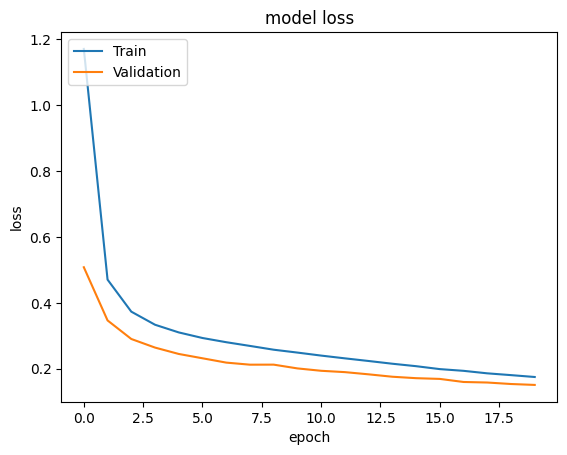

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.predict(np.array([x_test[0]]))

1/1 [==============================] - 0s 85ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)